<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Deep-CNN-Architecture-Implementation/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Setup Dataset Path 

In [3]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''


"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [4]:
''' 
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''


" \nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocssing using ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
WIDTH=224
HEIGHT=224

In [9]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    rotation_range=10,
                                    height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [10]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [11]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [12]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [13]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

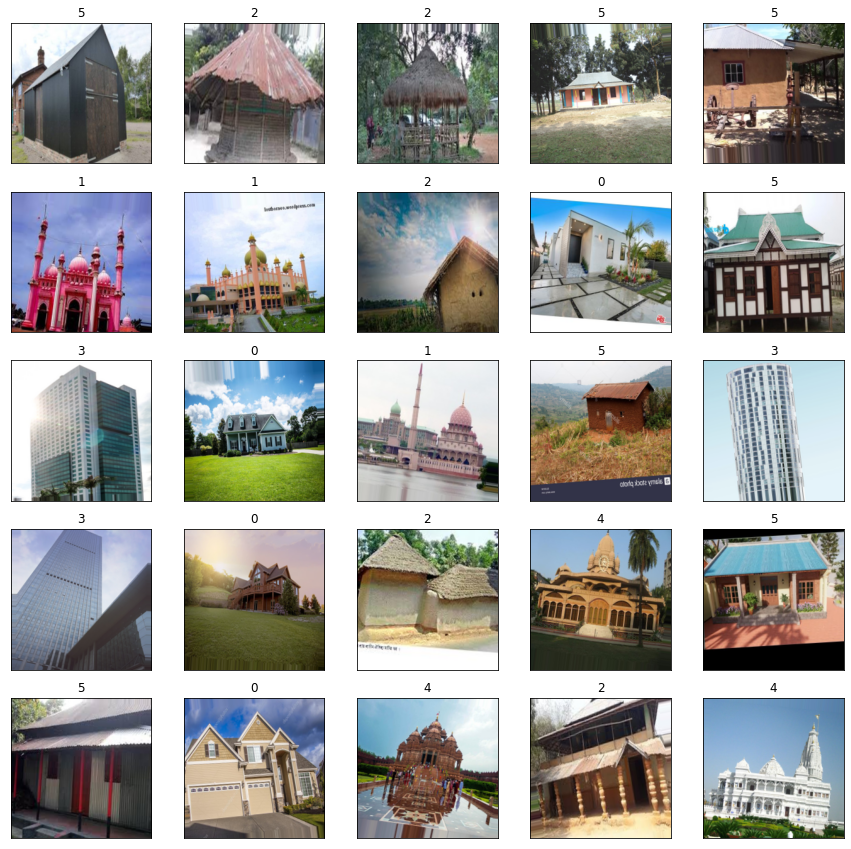

In [14]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

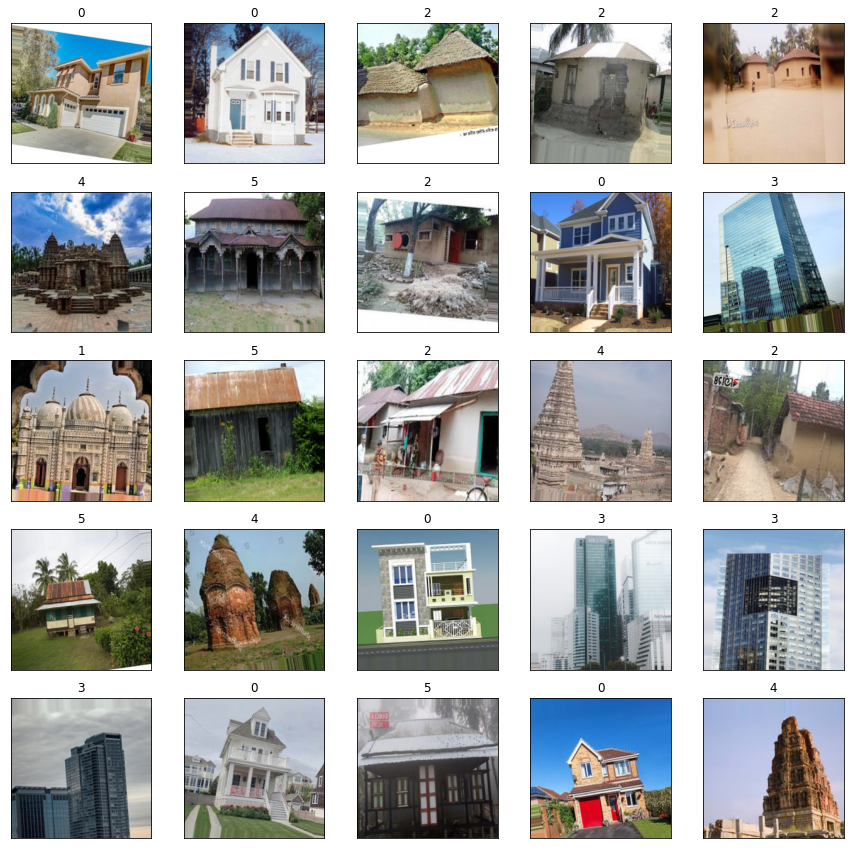

In [15]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Define Convolutional Neural Network Architecture

In [16]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow as tf

In [17]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(total_class,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/CNN1625224887.png


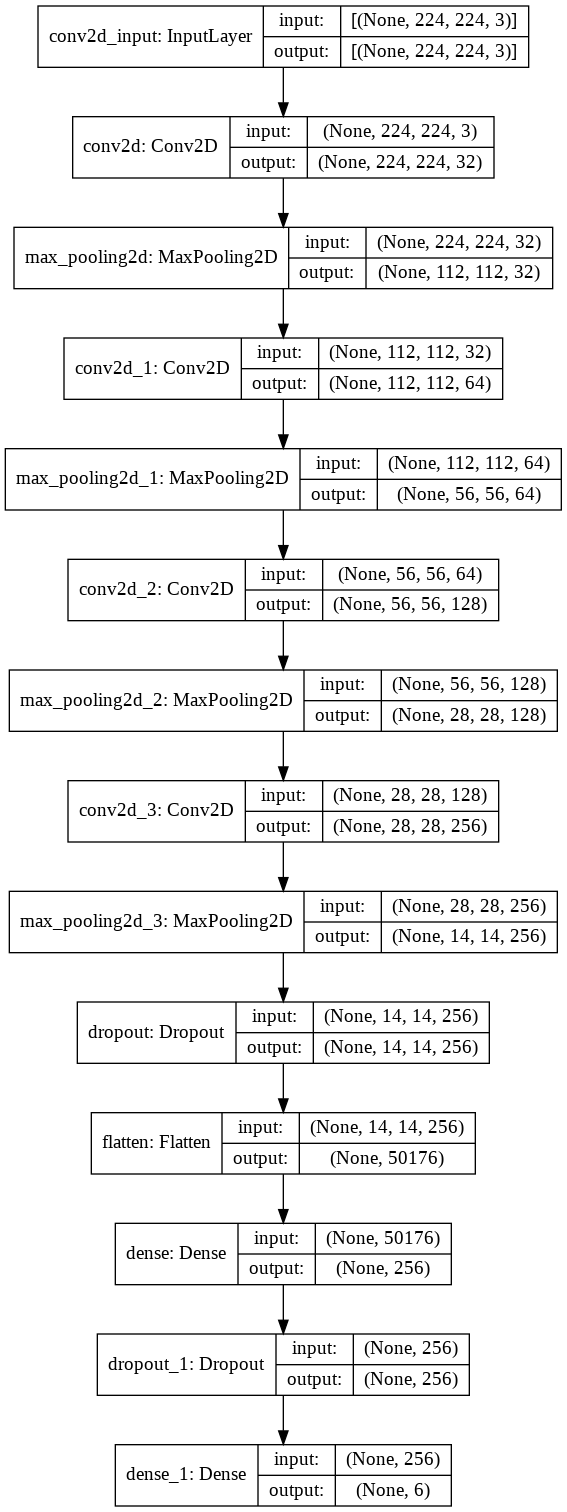

In [19]:
import time
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/CNN'+str(int(t))+'.png'
print(image_name)
keras.utils.plot_model(model,show_shapes=True,to_file=image_name)

## Compile CNN Model

In [20]:
model.compile(loss='categorical_crossentropy' ,
              optimizer='adam' ,
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC()])

## Trained  CNN Model

In [21]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [22]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [23]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,callbacks=[checkpointer])

Epoch 1/200
30/30 [==============================] - 439s 14s/step - loss: 1.7476 - accuracy: 0.2865 - precision: 0.3168 - recall: 0.0333 - auc: 0.6400 - val_loss: 1.5802 - val_accuracy: 0.3795 - val_precision: 1.0000 - val_recall: 0.0089 - val_auc: 0.7337

Epoch 00001: val_loss improved from inf to 1.58017, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5
Epoch 2/200
30/30 [==============================] - 15s 506ms/step - loss: 1.4522 - accuracy: 0.4177 - precision: 0.6517 - recall: 0.1365 - auc: 0.7736 - val_loss: 1.4028 - val_accuracy: 0.4196 - val_precision: 0.5843 - val_recall: 0.2321 - val_auc: 0.7961

Epoch 00002: val_loss improved from 1.58017 to 1.40277, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5
Epoch 3/200
30/30 [==============================] - 15s 497ms/step - loss: 1.2752 - accuracy: 0.4906 - precision: 0.6958 - recall: 0.2406 - auc: 0.8303 - val_lo

## Plot The Graphs

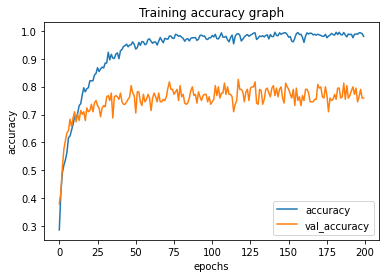

In [24]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

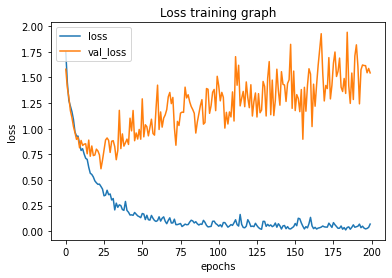

In [25]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

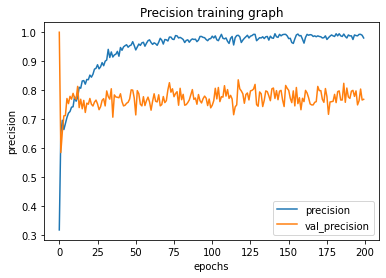

In [27]:
plt.xlabel('epochs')
plt.ylabel('precision')
plt.title('Precision training graph')
plt.plot(history.history['precision'],label='precision')
plt.plot(history.history['val_precision'],label='val_precision')
plt.legend()
plt.show()

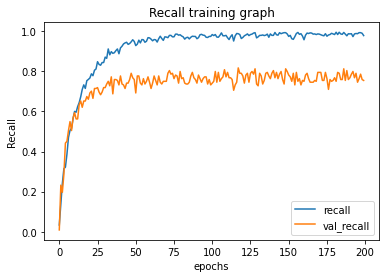

In [28]:
plt.xlabel('epochs')
plt.ylabel('Recall')
plt.title('Recall training graph')
plt.plot(history.history['recall'],label='recall')
plt.plot(history.history['val_recall'],label='val_recall')
plt.legend()
plt.show()

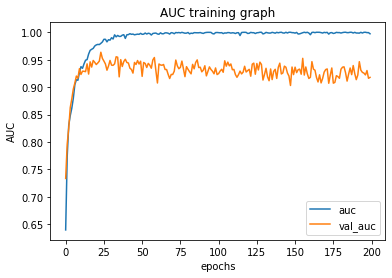

In [29]:
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.title('AUC training graph')
plt.plot(history.history['auc'],label='auc')
plt.plot(history.history['val_auc'],label='val_auc')
plt.legend()
plt.show()

## Testing the model

In [31]:
test_loss,test_accuracy,test_precision,test_recall,test_auc=model.evaluate(test_dataset)

10/10 [==============================] - 1s 119ms/step - loss: 2.2744 - accuracy: 0.7800 - precision: 0.7800 - recall: 0.7800 - auc: 0.9013


In [32]:
print('Accuracy of the model is : ',test_accuracy*100)
print('Loss of the model is : ',test_loss)
print('Precision of the model is : ',test_precision*100)
print('Recall of the model is : ',test_recall*100)
print('AUC of the model is : ',test_auc*100)

Accuracy of the model is :  77.99999713897705
Loss of the model is :  2.2744317054748535
Precision of the model is :  77.99999713897705
Recall of the model is :  77.99999713897705
AUC of the model is :  90.12755751609802


In [33]:
f1score=(2*test_precision*test_recall)/ (test_precision+test_recall)
print("F1 score: ",f1score*100)

F1 score:  77.99999713897705


## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [34]:
import time
t = time.time()
export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model0.7799999713897705_time_1625228737.h5


## Reload the model h5 format

In [35]:
from tensorflow.keras.models import load_model

In [36]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

## Check Random Image

In [37]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[1.0000000e+00 1.0655107e-14 1.1828452e-08 2.0203673e-19 7.5793025e-15
  3.9699555e-09]]
0


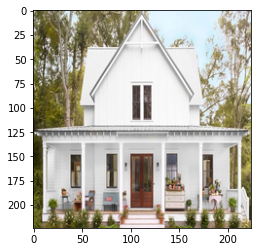

In [38]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/building_house5.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[6.2273154e-17 9.9986386e-01 8.6183046e-18 8.6148383e-10 1.3617144e-04
  7.7792319e-15]]
1


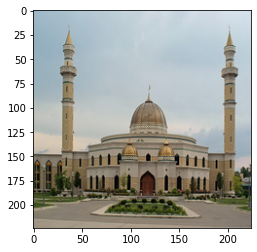

In [39]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mosque0.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.6749466e-15 9.8311609e-01 5.5105812e-14 5.7179482e-17 1.6883954e-02
  1.3319401e-16]]
1


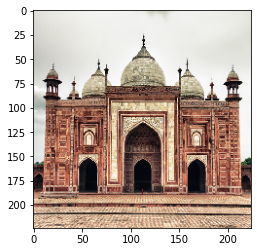

In [40]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mosque35.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[8.7838665e-14 1.9861013e-09 9.9999988e-01 1.3021052e-12 9.6367010e-08
  1.2116011e-10]]
2


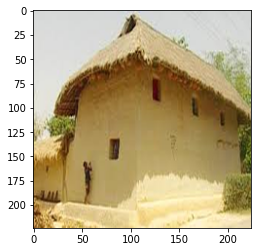

In [41]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mud72.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[3.4281849e-18 8.6061306e-08 8.1860584e-14 9.9999964e-01 2.3954118e-07
  1.7581641e-14]]
3


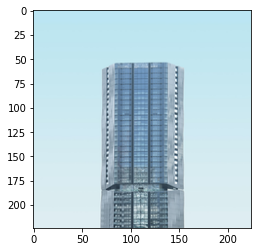

In [42]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/sky79.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.58501781e-27 4.88945330e-14 1.02775365e-20 2.10969750e-21
  1.00000000e+00 2.46620809e-33]]
4


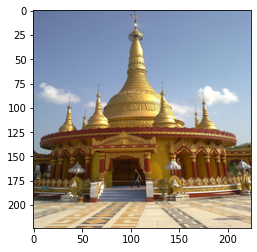

In [43]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/temple33.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.1219726e-11 1.2166616e-13 3.3084504e-11 1.3411109e-24 2.9159727e-08
  1.0000000e+00]]
5


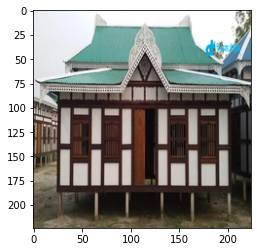

In [44]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/tinshed25.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.0318510e-28 8.4981718e-14 1.7057978e-26 7.6133607e-20 1.0000000e+00
  8.0530852e-31]]
4


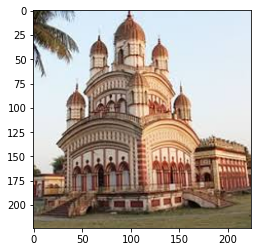

In [45]:
image_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/temple72.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

## Classification report 

In [46]:
predicted_result=model.predict(test_dataset)
predicted_result[:5]

array([[9.0280139e-23, 1.0000000e+00, 1.2539624e-27, 5.6498437e-16,
        7.8324536e-10, 3.9297789e-16],
       [2.3344509e-01, 1.1473793e-06, 3.9520739e-08, 7.6654810e-01,
        5.6566810e-06, 4.8998344e-10],
       [7.8639433e-14, 1.8055460e-03, 1.1995525e-12, 9.4199079e-01,
        5.6203660e-02, 7.3447514e-14],
       [5.4424332e-04, 4.0634884e-05, 3.0643668e-07, 5.6046730e-07,
        9.9125141e-01, 8.1627667e-03],
       [5.6653273e-01, 1.5215605e-04, 6.2104320e-08, 1.0049232e-15,
        8.7733455e-03, 4.2454171e-01]], dtype=float32)

In [47]:
predicted_result.shape

(300, 6)

In [48]:
predicted_value=np.argmax(model.predict(test_dataset),axis=-1)
predicted_value

array([4, 5, 4, 5, 4, 1, 2, 1, 5, 2, 5, 2, 0, 3, 3, 3, 2, 2, 1, 5, 4, 2,
       4, 1, 4, 1, 2, 3, 3, 0, 3, 1, 2, 1, 4, 1, 2, 5, 0, 4, 2, 5, 4, 2,
       3, 1, 5, 3, 3, 2, 2, 4, 0, 2, 5, 0, 3, 1, 0, 5, 2, 2, 0, 4, 4, 1,
       2, 1, 0, 4, 4, 2, 2, 5, 5, 5, 4, 4, 1, 1, 3, 1, 4, 2, 2, 5, 1, 0,
       4, 3, 4, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 0, 4, 3, 4, 4, 3, 2, 5,
       5, 2, 1, 5, 3, 3, 5, 5, 2, 5, 2, 3, 2, 5, 2, 4, 5, 5, 5, 3, 1, 2,
       4, 5, 4, 3, 3, 3, 5, 1, 5, 3, 2, 3, 3, 4, 0, 4, 4, 2, 2, 5, 0, 5,
       2, 2, 5, 5, 4, 5, 5, 1, 4, 0, 4, 4, 0, 0, 3, 1, 4, 5, 2, 2, 5, 0,
       4, 2, 4, 5, 0, 2, 4, 1, 3, 4, 1, 5, 4, 2, 0, 4, 4, 3, 5, 5, 5, 2,
       3, 2, 5, 0, 4, 0, 1, 2, 2, 2, 2, 5, 0, 0, 3, 5, 2, 4, 2, 1, 4, 1,
       5, 1, 4, 5, 1, 2, 4, 1, 4, 4, 4, 4, 0, 5, 5, 2, 3, 2, 3, 5, 3, 3,
       3, 1, 2, 3, 2, 5, 4, 5, 4, 3, 4, 3, 4, 4, 5, 4, 1, 4, 2, 5, 5, 3,
       5, 1, 4, 5, 0, 0, 5, 5, 3, 3, 5, 5, 4, 3, 3, 1, 2, 4, 1, 4, 5, 0,
       3, 3, 2, 3, 4, 4, 5, 3, 5, 2, 2, 5, 4, 4])

In [49]:
test_value=test_dataset.classes
test_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], d

In [50]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_dataset.classes,predicted_value))

Accuracy score:  0.15666666666666668


In [51]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(test_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.12      0.06      0.08        50
           1       0.21      0.14      0.17        50
           2       0.18      0.20      0.19        50
           3       0.08      0.08      0.08        50
           4       0.14      0.20      0.17        50
           5       0.20      0.26      0.23        50

    accuracy                           0.16       300
   macro avg       0.15      0.16      0.15       300
weighted avg       0.15      0.16      0.15       300



In [ ]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(label_batch,predicted_result))

## Another approach to calculate the classification report

In [ ]:
predicted_array=model.predict(validation_dataset)
predicted_array